<a href="https://colab.research.google.com/github/Chl681006/Project/blob/main/VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



In [ ]:
X_train = np.array([[0.05457441, 0.00773408],
       [0.05358265, 0.00881441],
       [0.04982931, 0.00849128],
       [0.04680667, 0.00770542],
       [0.04964223, 0.00929868],
       [0.04556077, 0.00761565],
       [0.04854265, 0.00921795],
       [0.04832876, 0.0088317 ],
       [0.04767556, 0.00832715],
       [0.04797683, 0.0084658 ],
       [0.04762395, 0.00891073],
       [0.04739286, 0.0086932 ],
       [0.04553577, 0.00791633],
       [0.04883061, 0.00835324],
       [0.05184952, 0.0090539 ],
       [0.04913787, 0.0090007 ],
       [0.0501608 , 0.00933444],
       [0.04811049, 0.00852102],
       [0.05053025, 0.00914345],
       [0.04923277, 0.00863267],
       [0.04836625, 0.0089309 ],
       [0.05031756, 0.00853091],
       [0.05043995, 0.00862014],
       [0.05265115, 0.00895845],
       [0.05560986, 0.00920085],
       [0.05060181, 0.00849026],
       [0.05398361, 0.00876301],
       [0.06027998, 0.009621  ],
       [0.05601951, 0.00976806],
       [0.05111995, 0.00814204],
       [0.05961667, 0.00938186]])

In [ ]:
data = pd.DataFrame(X_train, columns=["A", "B"])

In [ ]:
data

,A,B
0,0.054574,0.007734
1,0.053583,0.008814
2,0.049829,0.008491
3,0.046807,0.007705
4,0.049642,0.009299
5,0.045561,0.007616
6,0.048543,0.009218
7,0.048329,0.008832
8,0.047676,0.008327
9,0.047977,0.008466


Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.6879 - val_loss: 2.1544
Epoch 2/50
1/1 [==============================] - 0s 40ms/step - loss: 0.6825 - val_loss: 2.1635
Epoch 3/50
1/1 [==============================] - 0s 44ms/step - loss: 0.6782 - val_loss: 2.1732
Epoch 4/50
1/1 [==============================] - 0s 39ms/step - loss: 0.6735 - val_loss: 2.1820
Epoch 5/50
1/1 [==============================] - 0s 37ms/step - loss: 0.6686 - val_loss: 2.1915
Epoch 6/50
1/1 [==============================] - 0s 36ms/step - loss: 0.6635 - val_loss: 2.2009
Epoch 7/50
1/1 [==============================] - 0s 35ms/step - loss: 0.6582 - val_loss: 2.2099
Epoch 8/50
1/1 [==============================] - 0s 48ms/step - loss: 0.6528 - val_loss: 2.2187
Epoch 9/50
1/1 [==============================] - 0s 37ms/step - loss: 0.6471 - val_loss: 2.2282
Epoch 10/50
1/1 [==============================] - 0s 35ms/step - loss: 0.6411 - val_loss: 2.2379
Epoch 11/50
1/1 [==============

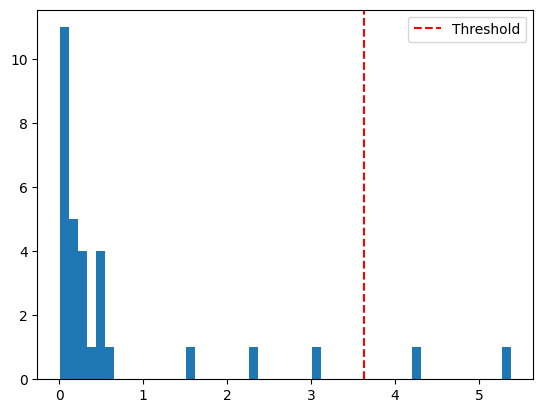

In [ ]:
# 2. 对数据进行标准化处理：
from sklearn.preprocessing import StandardScaler

# 对数据进行标准化处理
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 3. 定义 Variational Autoencoder 模型：

# 定义输入层
input_dim = data_scaled.shape[1]
input_layer = keras.Input(shape=(input_dim,))

# 定义编码层
encoded = layers.Dense(32, activation='relu')(input_layer)
encoded = layers.Dense(16, activation='relu')(encoded)
encoded = layers.Dense(8, activation='relu')(encoded)
encoded_output = layers.Dense(2)(encoded)

# 定义解码层
decoded = layers.Dense(8, activation='relu')(encoded_output)
decoded = layers.Dense(16, activation='relu')(decoded)
decoded = layers.Dense(32, activation='relu')(decoded)
decoded_output = layers.Dense(input_dim)(decoded)

# 定义 Variational Autoencoder 模型
vae = keras.Model(input_layer, decoded_output)

# 4. 编译模型，并进行训练：

# 编译模型
vae.compile(optimizer='adam', loss='mse')

# 训练模型
history = vae.fit(data_scaled, data_scaled, epochs=50, batch_size=32, validation_split=0.2)

# 5. 使用训练好的模型进行预测，并计算重构误差：

# 使用模型进行预测，并计算重构误差
preds = vae.predict(data_scaled)
mse = np.mean(np.power(data_scaled - preds, 2), axis=1)

# 6. 根据重构误差，选取阈值进行异常检测：

# 选取阈值进行异常检测
threshold = np.percentile(mse, 95)
outliers = data[mse >= threshold]


# 7. 可以通过绘制重构误差分布的直方图来选择合适的阈值：

# 绘制重构误差分布的直方图
plt.hist(mse, bins=50)
plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.show()

In [ ]:
outliers

,A,B
27,0.060280,0.009621
30,0.059617,0.009382


In [ ]:
clean_data = data[mse < threshold]
clean_data

,A,B
0,0.054574,0.007734
1,0.053583,0.008814
2,0.049829,0.008491
3,0.046807,0.007705
4,0.049642,0.009299
5,0.045561,0.007616
6,0.048543,0.009218
7,0.048329,0.008832
8,0.047676,0.008327
9,0.047977,0.008466


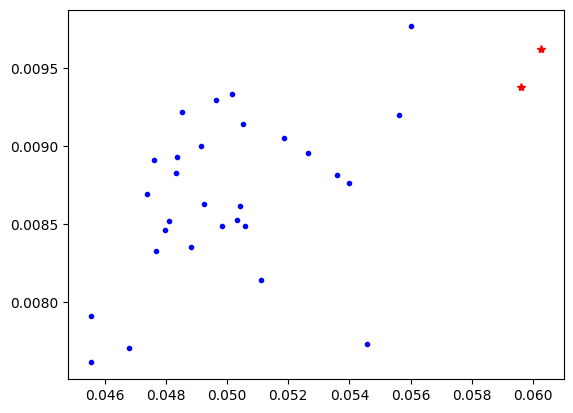

In [ ]:
plt.plot(clean_data['A'],clean_data['B'],'b.')
plt.plot(outliers['A'],outliers['B'],'r*')